# Лабораторная 1. Упражнение 2. Вариант 22 (=4)
> Вероятность |1>: 20
> 
> Вероятность |0>: 80
## Импорты и функции

In [158]:
import math

from matplotlib import pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector


simulator = AerSimulator()


def print_circuit_cf(qc: QuantumCircuit):
    def calc_cf():
        state = Statevector.from_instruction(qc.remove_final_measurements(inplace=False))
        max_len = state.num_qubits
        
        return {
            '0' * (max_len - len(bin(i)) + 2) + bin(i)[2:]: amplitude
            for i, amplitude in enumerate(state.data)
        }
    
    print(*[f"|{k}> : {v}" for (k, v) in calc_cf().items()], sep='\n')

## Задание 1. 
Получите кубит в состоянии суперпозиции $\frac{1}{\sqrt{2}} (|0> + |1>)$

|0> : (0.7071067811865475+0j)
|1> : (0.7071067811865475+0j)


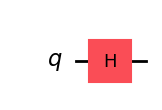

In [159]:
qc = QuantumCircuit(1)
qc.h(0)
print_circuit_cf(qc)
qc.draw('mpl')

## Задание 2. 
Получите двумя способами кубит в состоянии суперпозиции $\frac{1}{\sqrt{2}} (|0> - |1>)$

|0> : (0.7071067811865475+0j)
|1> : (-0.7071067811865475+0j)


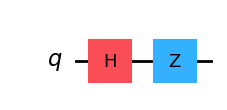

In [160]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
print_circuit_cf(qc)
qc.draw('mpl')

|0> : (0.7071067811865475+0j)
|1> : (-0.7071067811865475+0j)


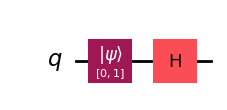

In [161]:
qc = QuantumCircuit(1)
qc.initialize([0, 1], 0)
qc.h(0)
print_circuit_cf(qc)
qc.draw('mpl')

## Задание 3. 
Получите кубит в состоянии суперпозиции $\frac{1}{\sqrt{2}} (- |0> + |1>)$

|0> : (-0.7071067811865475+0j)
|1> : (0.7071067811865475+0j)


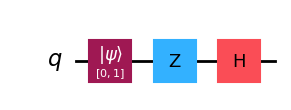

In [162]:
qc = QuantumCircuit(1)
qc.initialize([0, 1], 0)
qc.z(0)
qc.h(0)
print_circuit_cf(qc)
qc.draw('mpl')

## Мой вариант:
> Вероятность |1>: 20
> 
> Вероятность |0>: 80
> 
Считаем корни

In [163]:
def calc_prob(x): return math.sqrt((x / 100))

a = calc_prob(80)
b = calc_prob(20)


def run(qc: QuantumCircuit):
    print_circuit_cf(qc)
    qc.measure_all()
    print("Результаты: ", simulator.run(qc, shots=1024).result().get_counts(qc))

## Задание 4.
С помощью вентиля RX создайте кубит в состоянии (a |0⟩ + b |1⟩). Выполните симуляцию. Получите математическое обоснование результата.
> Вертиль RX поварачивает состояние кубита вокруг X, что позволяет получить нужные амплитуды.  
> Похожая логика и в следующих заданиях с гейтами RX и RY.

In [176]:
qc = QuantumCircuit(1)
qc.rx(- 2 * math.acos(a), 0)
run(qc)

|0> : (0.8944271909999159+0j)
|1> : 0.447213595499958j
Результаты:  {'1': 198, '0': 826}


## Задание 5.
С помощью однокубитного вентиля RY получите кубит в состоянии суперпозиции (a |0⟩ + b |1⟩). Выполните симуляцию. Получите математическое обоснование
результата.
>


In [177]:
qc = QuantumCircuit(1)
qc.ry(2 * math.acos(a), 0)
run(qc)

|0> : (0.8944271909999159+0j)
|1> : (0.447213595499958+0j)
Результаты:  {'1': 207, '0': 817}


## Задание 6. 
С помощью однокубитного вентиля U получите кубит в состоянии суперпозиции (a | 0⟩ + b | 1⟩). Выполните симуляцию. Получите математическое обоснование
результата.
> Мы не поворачиваем вокруг Z, поэтому остальные 0.
> Помимо угла поворота по X, гейт принимает углы поворота вокруг Z перед и после поворота по X.

In [178]:
qc = QuantumCircuit(1)
qc.u(2 * math.acos(a), 0, 0, 0)
run(qc)

|0> : (0.8944271909999159+0j)
|1> : (0.447213595499958+0j)
Результаты:  {'0': 814, '1': 210}


## Задание 7. 
С помощью однокубитного вентиля RX получите кубит в состоянии суперпозиции (a | 0⟩ − b | 1⟩). Выполните симуляцию. Получите математическое обоснование
результата.

In [179]:
qc = QuantumCircuit(1)
qc.rx(2 * math.acos(a), 0)
run(qc)

|0> : (0.8944271909999159+0j)
|1> : -0.447213595499958j
Результаты:  {'0': 827, '1': 197}


## Задание 8. 
С помощью однокубитного вентиля RY получите кубит в состоянии суперпозиции (a | 0⟩ − b | 1⟩). Выполните симуляцию. Получите математическое обоснование
результата.

In [182]:
qc = QuantumCircuit(1)
qc.ry(-2 * math.acos(a), 0)
run(qc)

|0> : (0.8944271909999159+0j)
|1> : (-0.447213595499958+0j)
Результаты:  {'0': 811, '1': 213}


## Задание 9.
С помощью однокубитного вентиля U получите кубит в состоянии суперпозиции (a |0⟩ − b |1⟩). Выполните симуляцию. Получите математическое обоснование
результата.

In [183]:
qc = QuantumCircuit(1)
qc.u(- 2 * math.acos(a), 0, 0, 0)
run(qc)

|0> : (0.8944271909999159+0j)
|1> : (-0.447213595499958+0j)
Результаты:  {'0': 808, '1': 216}


## Задание 10. 
С помощью вентилей поворота получите кубит в состоянии (a | 0⟩ + b | 1⟩). Выполните симуляцию. Получите математическое обоснование результата.

In [184]:
qc = QuantumCircuit(1)
qc.ry(2 * math.asin(b), 0)
run(qc)

|0> : (0.8944271909999159+0j)
|1> : (0.4472135954999579+0j)
Результаты:  {'0': 805, '1': 219}


## Задание 11.
С помощью вентиля RX получите кубит в состоянии суперпозиции (a |0⟩ + b |1⟩). Далее составьте схему.

![схема](pic/task2-1.png)

Выполните симуляцию. Получите математическое обоснование результата.

|0> : (0.6324555320336758+0.31622776601683794j)
|1> : (0.6324555320336758-0.31622776601683794j)
Результаты:  {'1': 533, '0': 491}


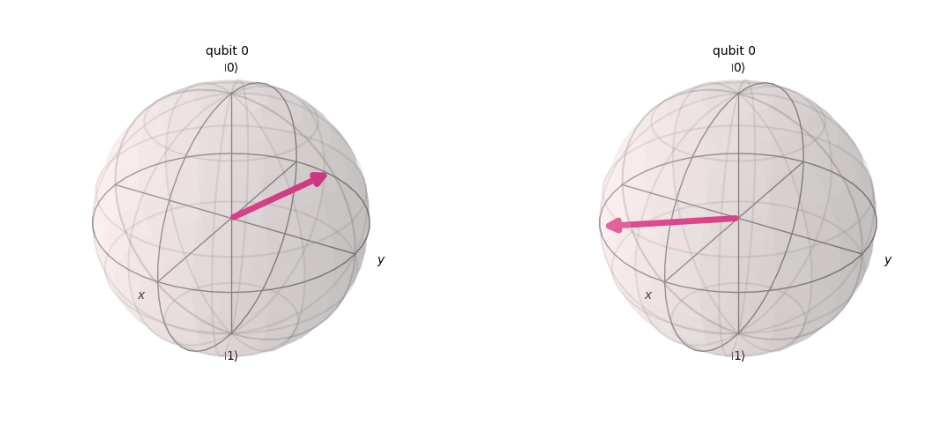

In [171]:
def draw(qc_list: [QuantumCircuit]):
    fig, axes = plt.subplots(1, len(qc_list), figsize=(12, 6))
    for i, qc in enumerate(qc_list):
        canvas = FigureCanvasAgg(plot_bloch_multivector(qc))
        canvas.draw()
        axes[i].imshow(canvas.buffer_rgba())
        axes[i].axis('off')
    plt.show()

draws = []
qc = QuantumCircuit(1)
qc.rx(- 2 * math.acos(a), 0)
draws.append(qc.remove_final_measurements(inplace=False))
qc.h(0)
draws.append(qc.remove_final_measurements(inplace=False))
run(qc)
draw(draws)

## Задание 12.
С помощью вентиля Rx получите кубит в состоянии суперпозиции a|0> + b|1>. Далее составьте схему. 

![схема](pic/task2-2.png)

Выполните симуляцию. Получите математическое обоснование результата.


|0> : (0.8944271909999156+0j)
|1> : 0.4472135954999579j
Результаты:  {'0 0': 837, '1 0': 187}


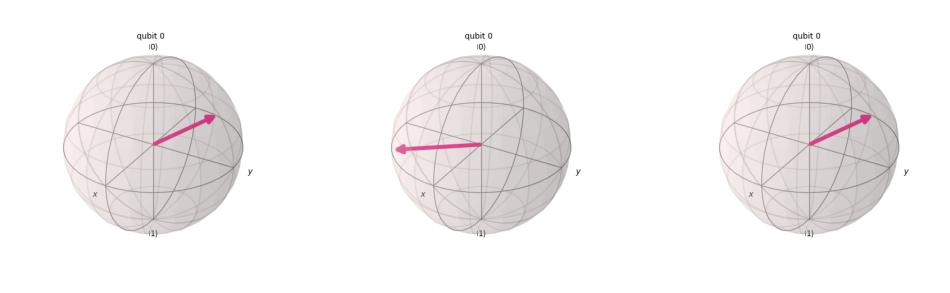

In [172]:
draws = []
qc = QuantumCircuit(1, 1)
qc.rx(- 2 * math.acos(a), 0)
draws.append(qc.remove_final_measurements(inplace=False))
qc.h(0)
draws.append(qc.remove_final_measurements(inplace=False))
qc.h(0)
draws.append(qc.remove_final_measurements(inplace=False))
run(qc)
draw(draws)

## Задание 13.
Составьте схему. 

![a](pic/task2-3-a.png)
![b](pic/task2-3-b.png)
![c](pic/task2-3-c.png)

Выполните симуляцию. Получите математическое обоснование результата.

a)
|0> : (0.7071067811865475+0j)
|1> : (0.7071067811865475+0j)
Результаты:  {'1 0': 485, '0 0': 539}
b)
|0> : (0.7071067811865475+0j)
|1> : (-0.7071067811865475+0j)
Результаты:  {'1 0': 511, '0 0': 513}
c)
|0> : (0.7071067811865475+0j)
|1> : (-0.7071067811865475+0j)
Результаты:  {'1 0': 497, '0 0': 527}


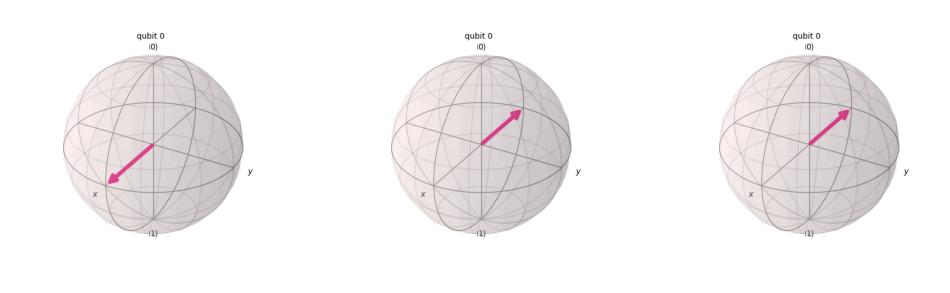

In [173]:
draws = []

print("a)")
qc = QuantumCircuit(1, 1)
qc.h(0)
run(qc)
draws.append(qc.remove_final_measurements(inplace=False))

print("b)")
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.h(0)
run(qc)
draws.append(qc.remove_final_measurements(inplace=False))

print("c)")
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.z(0)
run(qc)
draws.append(qc.remove_final_measurements(inplace=False))

draw(draws)

## Задание 14.
Соберите квантовые схемы. 

![a](pic/task2-4-a.png)
![b](pic/task2-4-b.png)

Выполните симуляцию. Получите математическое обоснование результата.

|00> : (0.4999999999999999+0j)
|01> : (0.4999999999999999+0j)
|10> : (0.4999999999999999+0j)
|11> : (0.4999999999999999+0j)
Результаты:  {'00 00': 249, '10 00': 263, '01 00': 265, '11 00': 247}


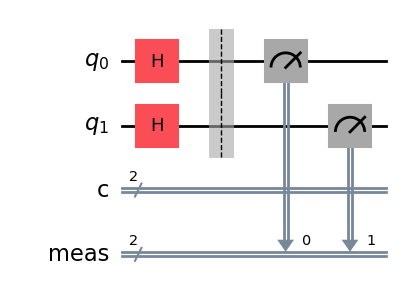

In [174]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.h(1)
run(qc)
qc.draw('mpl')

|00> : (0.4999999999999999+0j)
|01> : (0.4999999999999999+0j)
|10> : (-0.4999999999999999+0j)
|11> : (-0.4999999999999999+0j)
Результаты:  {'01 00': 285, '10 00': 261, '00 00': 221, '11 00': 257}


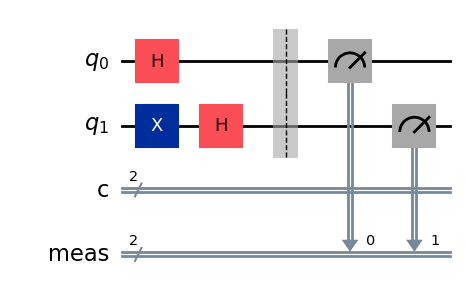

In [175]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.x(1)
qc.h(1)
run(qc)
qc.draw('mpl')